# Energy-based PPO
#### Team MIRAM
---

Makar Korchagin, Ilya Zherebtsov, Rinat Prochii, Aibek Akhmetkazy, Mikhail Gubanov

# Environment

For the third project we have chosen the Inverted Double Pendulum environment with the custon reward function. The aim of the enviornmnet is to balance the Inverted Double Pendulum via controlling the movements of the cart, to which the pendulum is attached.

![Inverted double pendulum](https://gymnasium.farama.org/_images/inverted_double_pendulum.gif)



## State space

![Double pendulum system](https://www.researchgate.net/profile/Slavka-Jadlovska-2/publication/258795979/figure/fig2/AS:392622284787714@1470619855067/Classical-double-inverted-pendulum-system-scheme-and-basic-nomenclature.png)

The system has the state space of 12 continuous variables:

$x \in \mathbb{R}$ - is the position of the cart with mass $m$;

$\dot{x} \in \mathbb{R}$ - is the speed of the cart with mass $m$;

$\ddot{x} \in \mathbb{R}$ - is the acceleration of the cart with mass $m$;

$\theta_1 \in [0, 2\pi]$ - is the angle of the hinge with mass $m_1$ w.r.t. the vertical axis;

$\theta_2 \in [0, 2\pi]$ - is the angle of the hinge with mass $m_2$ w.r.t. the vertical axis;

$\dot{\theta}_1 \in \mathbb{R}$ - is the anglular velocity of the hinge with mass $m_1$;

$\dot{\theta}_2 \in \mathbb{R}$ - is the anglular velocity of the hinge with mass $m_2$;

$\ddot{\theta}_1 \in \mathbb{R}$ - is the anglular acceleration of the hinge with mass $m_1$;

$\ddot{\theta}_2 \in \mathbb{R}$ - is the anglular acceleration of the hinge with mass $m_2$;

$f_0, f_1, f_2 \in \mathbb{R}$ - the friction forces for each degree of freedom.

Aside from the state vector, the system has 5 hyperparameters:

$m$ - the mass of the cart;

$m_1, m_2$ - the masses of the first and second hinges respectively;

$J_1, J_2$ - inertia momentums of the first and second poles respectively.

### Mathematical model


Using the state variables and hyperparameters defined above, we can derive the second-order differential equation, that describes the behaviour of the given system

$$H_1(z)\ddot{z}=H_2(z,\dot{z})\dot{z}+h_3(z)+h_0u,$$

where

$$z = (x, \theta_1, \theta_2)^T;$$

$$H_1(z) =
\begin{bmatrix}
a_0 & a_1\cos\theta_1 & a_2\cos\theta_2 \\
a_1\cos\theta_1 & b_1 & a_2l_1\cos(\theta_2-\theta_1) \\
a_2\cos\theta_2 & a_2l_1\cos(\theta_2 - \theta_1) & b_2 \\
\end{bmatrix};
$$

$$H_2(z, \dot{z}) =
\begin{bmatrix}
-f_0 & a_1\sin\theta_1\dot{\theta}_1 & a_2\sin\theta_2\dot{\theta}_2 \\
0 & - f_1 - f_2 & a_2l_1\sin\theta_2 \dot{\theta}_2 \\
0 & -a_2l_1\sin(\theta_2 - \theta_1)\dot{\theta}_1 + f_2 & - f_2 - f_3 \\
\end{bmatrix};
$$

$$
h_3(z) =
\begin{bmatrix}
0 & a_1g\sin\theta_1 & a_2g\sin\theta_2
\end{bmatrix}^T.
$$

The constants above denotes the following formulae

$$a_0 = m + m_1 + m_2;$$

$$a_1 = m_1l_1 + m_2l_2;$$

$$a_2 = m_2l_2;$$

$$b_1 = J_1 + m_1l_1^2 + m_2l_2^2;$$

$$b_2 = J_2 + m_2l_2^2.$$


### Initial state

The initial positions of the poles and cart are randomly sampled from uniformly distributed noise, while the initial velocities are randomly sampled from the normal distributions. The second derivatives and other variables are zeros at the initial state

$$s_0 =
\begin{cases}
(\theta_1, \theta_2, x) \sim \mathcal{U}(-0.1 \times I_3, 0.1 \times I_3); \\
(\dot{\theta}_1, \dot{\theta}_2, \dot{x}) \sim \mathcal{N}(0_3, 0.1 \times I_3); \\
(\ddot{\theta}_1, \ddot{\theta}_2, \ddot{x}, f_0, f_1, f_2) = 0_6.
\end{cases}
$$

### State space outline

In conclusion, the environment of the Inverted Double Pendulum has a state vector of $s \in \mathbb{S} \subset \mathbb{R}^{12}$ with 9 variables of unlimited real numbers and two variables limited by the interval of $[0, 2\pi]$.

## Action space

The action space is a single continuous variable $f \in [-1, 1]$ denoting the force [N] applied to the moving cart along $X$ axis.

## Observation space

The environment support two types of observation spaces: kinmatics vector and the RGB image of the system. In this project we have decided to choose the first option.

The observation vector of kinematics type includes 11 continuous variables:

$x \in \mathbb{R}$ - is the position of the cart along x axis;

$\sin\theta_1 \in [-1, 1]$ - is the sine of the angle of the first hinge;

$\sin\theta_2 \in [-1, 1]$ - is the sine of the angle of the second hinge;

$\cos\theta_1 \in [-1, 1]$ - is the cosine of the angle of the first hinge;

$\cos\theta_2 \in [-1, 1]$ - is the cosine of the angle of the second hinge;

$u \in \mathbb{R}$ - is the velocity of the cart;

$\dot{\theta}_1 \in \mathbb{R}$ - is the angular velocity of the first hinge;

$\dot{\theta}_2 \in \mathbb{R}$ - is the angular velocity of the first hinge;

$f_1, f_2, f_3 \in \mathbb{R}$ - are the contraints for each degree of freedom (cart pole position, first and second hinge angles respectively).


## Reward

The original reward introduce the constant reward for every step that can be decreased because of low position of the pendulum's tip and high speed of the cart

$$r(s,a) = 10 - (0.01 x^2 + (y-2)^2) - 0.001 v_1^2 + 0.005 v_2^2,$$

where:

$x, y$ - are the coordinates of the free tip of the pendulum;

$v_1, v_2$ - are the absolute velocities of the poles' centres of masses.

We decided to change the reward, using the physics assumptions. It is obvoius that the pendulum holding is the task of the potential energy $V$ maximization and kinetic energy $T$ minimization

$$
\begin{cases}
V \rightarrow \max{}; \\
T \rightarrow 0.
\end{cases}
$$

Essentially, we propose is to equalize the reward function to the negative Lagrangian of the system

$$r_E(s,a) = -L = \sum_{i=0}^2 V_i - T_i,$$

where:

$$T_0 = \frac{m\dot{x}^2}{2}, V_0 = 0;$$

$$T_1 = \frac{m_1v_1^2}{2} + \frac{J_1 \dot{\theta}_1^2}{2}=\frac{7}{24}m_1l_1^2\dot{\theta}_1^2, V_1 = \frac{1}{2}m_1gl_1\cos\theta_1;$$

$$T_2 = \frac{m_2v_2^2}{2} + \frac{J_2 \dot{\theta}_2^2}{2}= \frac{m_2l_2^2}{2} \left( \dot{\theta}_1^2 + \frac{1}{4} \dot{\theta}_2^2 + \dot{\theta}_1\dot{\theta}_2\cos(\theta_1 - \theta_2)\right) + \frac{m_2l_2\dot{\theta}_2^2}{6}, V_2 = m_2g\left(l_1\cos\theta_1 + \frac{1}{2}l_2\cos\theta_2 \right).$$

Moreover, the proposed reward can be calculated using the observation vector and hyperparameters values only.

For simplicity, the reward function can be normalized to the masses $m_1 = m_2 = m = 1$ and lengths $l_1 = l_2 = 1$ of the poles

$$
r_E(s,a) = g\cos\theta_1 + \frac{1}{2}g\cos\theta_2 - \frac{19}{24}\dot{\theta}_1^2 - \frac{7}{24}\dot{\theta}_2^2 - \frac{1}{2}\dot{\theta}_1\dot{\theta}_2\cos(\theta_1 - \theta_2).
$$





### Reward normalization

Evidently, the rewards have different ranges. To make them comparable, we decided to normalize both of them to their maximum values.

For original reward the maximum value is

$$\max{r(s,a)} = 10, \text{if}\, x, y, v_1, v_2 = 0.$$

For energy-based reward

$$\max{r_E(s,a)} = \frac{1}{2}g (2m_2l_1 + m_2l_2 + m_1l_1), \text{if}\, \theta_1, \theta_2, \dot{x}, \dot{\theta_1}, \dot{\theta_2} = 0.$$

For $l_1 = l_2 = 0.6$ and $m_1 = m_2 = 1$ the maximum reward is

$$\max{r_E} = \frac{1}{2} \cdot 9.81 (2\cdot0.6 + 0.6 + 0.6) = 9.81 \cdot 1.2 = 11.772.$$

Thus, normalizing both rewards to their maximum values, we may compare the performance of both agents.

### Reward implementation

The reward has been implemented as a class with `__call__` method for reward computation.

```python

import numpy as np

ELEMENTS = 3

class EnergyReward:
    def __init__(
        self,
        pole1_length: float = 0.6,
        pole2_length: float = 0.6,
        cart_mass: float = 1,
        pole1_mass: float = 1,
        pole2_mass: float = 1,
        g: float = 9.81,
    ):
        """Init environment hyperparameters."""
        self._cart_mass = cart_mass
        self._mass1 = pole1_mass
        self._mass2 = pole2_mass
        self._length1 = pole1_length
        self._length2 = pole2_length
        self._g = g

    def __call__(self, observation: np.ndarray) -> float:
        """Calculate the energy-based reward."""
        sin1, sin2, cos1, cos2, dx, dtheta1, dtheta2 = observation[1:-1]

        e_t = np.zeros(shape=ELEMENTS)
        e_v = np.zeros(shape=ELEMENTS)

        # Calculate potential energies of the cart, first and second poles
        e_v[0] = 0
        e_v[1] = self._mass1 * self._g * self._length1 / 2 * cos1
        e_v[2] = self._mass2 * self._g * (
            self._length2 / 2 * cos2 + self._length1 * cos1
            )

        cos_diff = cos1 * cos2 + sin1 * sin2
        # Calculate the kinetic energies of the corresponding elements
        e_t[0] = self._cart_mass / 2 * dx**2
        e_t[1] = 7 / 24 * self._mass1 * self._length1**2 * dtheta1**2 
        e_t[2] = self._mass2 * self._length2 * dtheta2**2 / 6
        e_t[2] += self._mass2 * self._length2**2 / 2 * (
            dtheta1**2 + dtheta2**2 / 4 + dtheta1 * dtheta2 * cos_diff
            )

        return np.sum(e_v - e_t)
```

## Imports

In [ ]:
import os

import numpy as np
import torch

from src.trpo import TRPO
from src.tools import train, evaluate, load_model
from src.utils import mp4_to_gif

In [ ]:
# Set random seeds for reproducibility
SEED = 42
torch.manual_seed(SEED)
np.random.seed(SEED)

# Set environment name
ENV_NAME = "InvertedDoublePendulum-v5"
os.makedirs("results", exist_ok=True)

In [ ]:
# Set device (GPU if available)
device = "cuda" if torch.cuda.is_available() else "cpu"

## Train
We now train the agent using the configuration we define. The training loop will print progress, and after training we obtain training statistics such as average episode rewards and episode lengths. 

In train config we can choose the `reward_type` we need (`"rewards"` for the standart or `"energies"` for energy based) and the `agent` we need (`TRPO` or `PPO`).

The example for energy based reward for TRPO

In [2]:
agent = train(
    env_name=ENV_NAME,
    agent=TRPO,
    num_epochs=350,
    steps_per_epoch=4096,
    gamma=0.99,
    reward_type="energies",
)

NameError: name 'train' is not defined

**Training code snippet**

```python
def train(
    env_name: str,
    agent: PPO | TRPO,
    num_epochs: int = 500,
    steps_per_epoch: int = 4096,
    gamma: float = 0.99,
    reward_type: str = "reward",
    seed: int | None = None,
):
    # Create environment
    env = gym.make(env_name)

    # Get dimensions
    state_dim = env.observation_space.shape[0]
    action_dim = env.action_space.shape[0]

    # Create agent
    agent = agent(state_dim, action_dim, gamma=gamma)
    name = agent.__class__.__name__.lower()

    # Create energy reward calculator
    energy_reward_func = EnergyReward()
    best_reward = -np.inf

    # Create CSV logger
    os.makedirs("./results", exist_ok=True)
    csv_file = open(f"./results/{name}-train-{reward_type}.csv", "w", newline="")
    csv_writer = csv.writer(csv_file)
    csv_writer.writerow([
        "epoch",
        "length",
        "reward",
        "energy",
        "policy_loss",
        "value_loss",
        "kl",
        "entropy",
    ])

    # Training loop
    for epoch in tqdm.trange(num_epochs, desc=f"{name.upper()} training"):
        # Collect trajectories
        trajectories = collect_trajectories(
            env, agent, energy_reward_func, steps_per_epoch, seed
        )

        # Update agent
        update_info = agent.update(
            trajectories["states"],
            trajectories["actions"],
            trajectories[reward_type],
            trajectories["masks"],
        )

        # Write to CSV
        for i in range(len(trajectories["episode_lengths"])):
            csv_writer.writerow([
                epoch,
                trajectories["episode_lengths"][i],
                trajectories["episode_rewards"][i],
                trajectories["episode_energies"][i],
                update_info["policy_loss"],
                update_info["value_loss"],
                update_info["kl"],
                update_info["entropy"],
            ])
        csv_file.flush()

        # Save model periodically
        if np.mean(trajectories[reward_type]) > best_reward:
            best_reward = np.mean(trajectories[reward_type])
            torch.save(
                {
                    "policy": agent.policy.state_dict(),
                    "value": agent.value.state_dict(),
                },
                f"./results/{name}-{reward_type}-best.pt",
            )

    csv_file.close()
    env.close()
    return agent
```

**Agent code snippet**

Policy snippet

```python
class PolicyNetwork(nn.Module):
    def __init__(self, input_dim: int, output_dim: int, hidden_dim: int = 64):
        super(PolicyNetwork, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.mean = nn.Linear(hidden_dim, output_dim)
        self.log_std = nn.Parameter(torch.zeros(output_dim))

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        mean = self.mean(x)
        std = torch.exp(self.log_std)
        return mean, std

    def get_action(self, state, deterministic=False):
        mean, std = self.forward(state)
        if deterministic:
            return mean
        else:
            dist = Normal(mean, std)
            action = dist.sample()
            return action

    def log_prob(self, state, action):
        mean, std = self.forward(state)
        dist = Normal(mean, std)
        return dist.log_prob(action).sum(dim=-1)

    def get_kl(self, state, other):
        mean1, std1 = self.forward(state)
        mean2, std2 = other.forward(state)

        dist1 = Normal(mean1, std1)
        dist2 = Normal(mean2, std2)

        kl = torch.distributions.kl.kl_divergence(dist1, dist2).sum(dim=-1).mean()
        return kl
```

Value code snippet

```python
class ValueNetwork(nn.Module):
    def __init__(self, input_dim: int, hidden_dim: int = 64):
        super(ValueNetwork, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return self.fc3(x).squeeze()
```

TRPO code snippet

```python
class TRPO:
    def __init__(
        self,
        state_dim: int,
        action_dim: int,
        hidden_dim: int = 64,
        gamma: float = 0.99,
        tau: float = 0.95,
        delta: float = 0.01,
        damping: float = 0.1,
        cg_iters: int = 10,
        backtrack_iters: int = 10,
        backtrack_coeff: float = 0.8,
    ):
        self.gamma = gamma
        self.tau = tau
        self.delta = delta
        self.damping = damping
        self.cg_iters = cg_iters
        self.backtrack_iters = backtrack_iters
        self.backtrack_coeff = backtrack_coeff

        self.policy = PolicyNetwork(state_dim, action_dim, hidden_dim)
        self.value = ValueNetwork(state_dim, hidden_dim)
        self.value_optimizer = torch.optim.Adam(self.value.parameters(), lr=5e-4)

    def _compute_advantages(self, rewards, values, masks):
        advantages = torch.zeros_like(rewards)
        returns = torch.zeros_like(rewards)
        gae = 0

        for t in reversed(range(len(rewards))):
            if t == len(rewards) - 1:
                next_value = 0
            else:
                next_value = values[t + 1]

            delta = rewards[t] + self.gamma * next_value * masks[t] - values[t]
            gae = delta + self.gamma * self.tau * masks[t] * gae

            advantages[t] = gae
            returns[t] = advantages[t] + values[t]

        return advantages, returns

    def _cg(self, Ax, b, iters=10):
        x = torch.zeros_like(b)
        r = b.clone()
        p = b.clone()
        r_dot_r = torch.dot(r, r)

        for _ in range(iters):
            Ap = Ax(p)
            alpha = r_dot_r / (torch.dot(p, Ap) + self.damping)

            x += alpha * p
            r -= alpha * Ap

            r_dot_r_new = torch.dot(r, r)
            beta = r_dot_r_new / r_dot_r
            r_dot_r = r_dot_r_new

            if r_dot_r < 1e-10:
                break

            p = r + beta * p

        return x

    def _hessian_vector_product(self, states, old_policy, vector):
        kl = self.policy.get_kl(states, old_policy)

        grads = torch.autograd.grad(kl, self.policy.parameters(), create_graph=True)
        flat_grad_kl = torch.cat([grad.view(-1) for grad in grads])

        kl_v = (flat_grad_kl * vector).sum()
        grads = torch.autograd.grad(kl_v, self.policy.parameters())
        flat_grad_grad_kl = torch.cat([grad.contiguous().view(-1) for grad in grads])

        return flat_grad_grad_kl

    def _surrogate_loss(self, states, actions, advantages, old_log_probs):
        log_probs = self.policy.log_prob(states, actions)
        ratio = torch.exp(log_probs - old_log_probs)
        return (ratio * advantages).mean()

    def update(self, states, actions, rewards, masks):
        states = torch.FloatTensor(states)
        actions = torch.FloatTensor(actions)
        rewards = torch.FloatTensor(rewards)
        masks = torch.FloatTensor(masks)

        # Update value function
        values = self.value(states)
        advantages, returns = self._compute_advantages(rewards, values, masks)
        advantages = (advantages - advantages.mean()) / (advantages.std() + 1e-8)

        # Value loss
        value_loss = -F.mse_loss(self.value(states), returns)
        self.value_optimizer.zero_grad()
        value_loss.backward()
        self.value_optimizer.step()

        # Policy gradient
        old_policy = PolicyNetwork(states.shape[1], actions.shape[1])
        old_policy.load_state_dict(self.policy.state_dict())

        old_log_probs = old_policy.log_prob(states, actions).detach()

        # Compute policy gradient
        loss = self._surrogate_loss(states, actions, advantages, old_log_probs)
        grads = torch.autograd.grad(loss, self.policy.parameters())
        flat_grad = torch.cat([grad.view(-1) for grad in grads])

        # Compute search direction with conjugate gradient
        Ax = lambda x: self._hessian_vector_product(states, old_policy, x)  # noqa: E731
        step_dir = self._cg(Ax, flat_grad, self.cg_iters)

        # Compute step size with line search
        shs = 0.5 * (step_dir * Ax(step_dir)).sum(0, keepdim=True)
        lm = torch.sqrt(shs / self.delta)
        full_step = step_dir / lm

        # Get current parameters
        params = torch.cat([param.view(-1) for param in self.policy.parameters()])

        # Line search
        expected_improve = (flat_grad * full_step).sum(0, keepdim=True).item()

        success = False
        for i in range(self.backtrack_iters):
            step_size = self.backtrack_coeff**i
            new_params = params + step_size * full_step

            # Update policy parameters
            idx = 0
            for param in self.policy.parameters():
                param_size = param.numel()
                param.data.copy_(new_params[idx : idx + param_size].view(param.size()))
                idx += param_size

            # Compute new loss
            new_loss = self._surrogate_loss(
                states, actions, advantages, old_log_probs
            ).item()

            # Check improvement
            improve = new_loss - loss.item()
            if improve > 0.1 * step_size * expected_improve:
                success = True
                break

        if not success:
            # Restore old parameters
            idx = 0
            for param in self.policy.parameters():
                param_size = param.numel()
                param.data.copy_(params[idx : idx + param_size].view(param.size()))
                idx += param_size

        return {
            "policy_loss": -loss.item(),
            "value_loss": value_loss.item(),
            "kl": self.policy.get_kl(states, old_policy).item(),
            "entropy": -old_log_probs.mean().item(),
        }
```

Entropy function for PPO

```python
def entropy(self, state):
    _, std = self.forward(state)
    return torch.log(std * torch.sqrt(torch.tensor(2 * np.pi * np.e))).sum(dim=-1)
```

PPO code snippet

```python
class PPO:
    def __init__(
        self,
        state_dim: int,
        action_dim: int,
        hidden_dim: int = 64,
        lr: float = 3e-4,
        gamma: float = 0.99,
        tau: float = 0.95,
        clip_param: float = 0.2,
        ppo_epochs: int = 10,
        mini_batch_size: int = 64,
        entropy_coef: float = 0.01,
        value_coef: float = 0.5,
    ):
        self.gamma = gamma
        self.tau = tau
        self.clip_param = clip_param
        self.ppo_epochs = ppo_epochs
        self.mini_batch_size = mini_batch_size
        self.entropy_coef = entropy_coef
        self.value_coef = value_coef

        self.policy = PolicyNetwork(state_dim, action_dim, hidden_dim)
        self.value = ValueNetwork(state_dim, hidden_dim)

        self.optimizer = torch.optim.Adam([
            {"params": self.policy.parameters(), "lr": lr},
            {"params": self.value.parameters(), "lr": lr},
        ])

    def _compute_advantages(self, rewards, values, masks):
        advantages = torch.zeros_like(rewards)
        returns = torch.zeros_like(rewards)
        gae = 0

        for t in reversed(range(len(rewards))):
            if t == len(rewards) - 1:
                next_value = 0
            else:
                next_value = values[t + 1]

            delta = rewards[t] + self.gamma * next_value * masks[t] - values[t]
            gae = delta + self.gamma * self.tau * masks[t] * gae

            advantages[t] = gae
            returns[t] = advantages[t] + values[t]

        return advantages, returns

    def update(self, states, actions, rewards, masks):
        states = torch.FloatTensor(states)
        actions = torch.FloatTensor(actions)
        rewards = torch.FloatTensor(rewards)
        masks = torch.FloatTensor(masks)

        # Compute values and advantages
        with torch.no_grad():
            values = self.value(states)
            advantages, returns = self._compute_advantages(rewards, values, masks)
            advantages = (advantages - advantages.mean()) / (advantages.std() + 1e-8)

        # Get old log probabilities
        with torch.no_grad():
            old_log_probs = self.policy.log_prob(states, actions)

        # Create dataset and dataloader for mini-batch updates
        dataset = TensorDataset(states, actions, old_log_probs, advantages, returns)
        dataloader = DataLoader(dataset, batch_size=self.mini_batch_size, shuffle=True)

        # Track metrics
        policy_loss_epoch = 0
        value_loss_epoch = 0
        entropy_epoch = 0
        kl_epoch = 0

        # PPO update loop
        for _ in range(self.ppo_epochs):
            for (
                batch_states,
                batch_actions,
                batch_old_log_probs,
                batch_advantages,
                batch_returns,
            ) in dataloader:
                # Policy loss
                log_probs = self.policy.log_prob(batch_states, batch_actions)
                ratio = torch.exp(log_probs - batch_old_log_probs)

                # Calculate KL divergence (for logging only)
                kl_div = (batch_old_log_probs - log_probs).mean().item()

                # Clipped policy objective
                surrogate1 = ratio * batch_advantages
                surrogate2 = (
                    torch.clamp(ratio, 1 - self.clip_param, 1 + self.clip_param)
                    * batch_advantages
                )
                policy_loss = -torch.min(surrogate1, surrogate2).mean()

                # Value loss
                value_pred = self.value(batch_states)
                value_loss = F.mse_loss(value_pred, batch_returns)

                # Entropy bonus
                entropy = self.policy.entropy(batch_states).mean()

                # Total loss
                loss = (
                    policy_loss
                    + self.value_coef * value_loss
                    - self.entropy_coef * entropy
                )

                # Update networks
                self.optimizer.zero_grad()
                loss.backward()
                self.optimizer.step()

                # Track metrics
                policy_loss_epoch += policy_loss.item()
                value_loss_epoch += value_loss.item()
                entropy_epoch += entropy.item()
                kl_epoch += kl_div

        # Average metrics over all batches
        num_batches = len(dataloader) * self.ppo_epochs
        return {
            "policy_loss": policy_loss_epoch / num_batches,
            "value_loss": value_loss_epoch / num_batches,
            "entropy": entropy_epoch / num_batches,
            "kl": kl_epoch / num_batches,
        }
```

## Evaluation and visualization

Here we are present evaluation of our models with pretrained weights that we train in `PPO.ipynb` and `TRPO.ipynb`


### Evaluation of TRPO models

Standart reward

In [ ]:
agent = load_model("./results/trpo-rewards-best.pt", agent)
evaluate(ENV_NAME, agent, num_episodes=1000, record_video=True, reward_type="rewards")

# Convert all mp4 files in the results folder to gif
mp4_to_gif("./results")

GIF here

Energy reward

In [ ]:
agent = load_model("./results/trpo-energies-best.pt", agent)
evaluate(ENV_NAME, agent, num_episodes=1000, record_video=True, reward_type="energies")

# Convert all mp4 files in the results folder to gif
mp4_to_gif("./results")

<p align="center">
    <img width="600" src="results\trpo-energy-episode-0.gif">
    <p align="center">Fig. 2 - TRPO agent with energy based reward</p>
</p>

**Evaluation code snippet**

```python
def evaluate(
    env_name: str,
    agent: PPO | TRPO,
    num_episodes: int = 10,
    record_video: bool = True,
    reward_type: str = "reward",
):
    name = agent.__class__.__name__.lower()

    # Create environment
    if record_video:
        env = gym.make(env_name, render_mode="rgb_array")
        env = gym.wrappers.RecordVideo(
            env,
            "results",
            episode_trigger=lambda x: x < 1,
            disable_logger=True,
            name_prefix=f"{name}-{reward_type}",
        )
    else:
        env = gym.make(env_name)

    # Create energy reward calculator
    energy_reward_calculator = EnergyReward()

    episode_rewards = []
    episode_energy_rewards = []
    episode_lengths = []

    # Create CSV logger
    os.makedirs("./results", exist_ok=True)
    csv_file = open(f"./results/{name}-eval-{reward_type}.csv", "w", newline="")
    csv_writer = csv.writer(csv_file)
    csv_writer.writerow([
        "length",
        "reward",
        "energy",
    ])

    for _ in tqdm.trange(num_episodes, desc=f"{name.upper()} evaluation"):
        state, _ = env.reset(seed=np.random.randint(10000))
        done = False
        episode_reward = 0
        episode_energy = 0
        episode_length = 0

        while not done:
            # Use deterministic action for evaluation
            with torch.no_grad():
                action = (
                    agent.policy.get_action(
                        torch.FloatTensor(state), deterministic=True
                    )
                    .detach()
                    .numpy()
                )

            next_state, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated

            # Calculate energy-based reward
            energy_reward = energy_reward_calculator(state)

            episode_reward += reward
            episode_energy += energy_reward
            episode_length += 1

            state = next_state

        csv_writer.writerow([episode_length, episode_reward, episode_energy])

        episode_rewards.append(episode_reward)
        episode_energy_rewards.append(episode_energy)
        episode_lengths.append(episode_length)

    data = pd.DataFrame(columns=["length", "reward", "energy"])
    data["length"] = episode_lengths
    data["reward"] = episode_rewards
    data["energy"] = episode_energy_rewards
    data.to_csv(f"./results/{name}-eval-{reward_type}.csv", index=False)

    # Calculate average metrics
    avg_reward = np.mean(episode_rewards)
    avg_energy_reward = np.mean(episode_energy_rewards)
    avg_length = np.mean(episode_lengths)

    print(f"Evaluation Results over {num_episodes} episodes:")
    print(f"Average Episode Length: {avg_length:.2f}")
    print(f"Average Episode Reward: {avg_reward:.2f}")
    print(f"Average Episode Energy Reward: {avg_energy_reward:.2f}")

    env.close()
    return avg_reward, avg_energy_reward, avg_length
```

### Evaluation of PPO models

Standart reward

In [ ]:
agent = load_model("./results/ppo-rewards-best.pt", agent)
evaluate(ENV_NAME, agent, num_episodes=1000, record_video=True, reward_type="rewards")

# Convert all mp4 files in the results folder to gif
mp4_to_gif("./results")

<p align="center">
    <img width="600" src="results\ppo-energy-episode-Standart.gif">
    <p align="center">Fig. 3 - PPO agent with standart reward</p>
</p>

Energy reward

In [ ]:
agent = load_model("./results/ppo-rewards-best.pt", agent)
evaluate(ENV_NAME, agent, num_episodes=1000, record_video=True, reward_type="energies")

# Convert all mp4 files in the results folder to gif
mp4_to_gif("./results")

<p align="center">
    <img width="600" src="results\ppo-energy-episode-0.gif">
    <p align="center">Fig. 4 - PPO agent with energy based reward</p>
</p>

### Benchmarking with Baseline Agent

Our agents can be benchmarked against baseline agents (e.g., Random Agent)

<p align="center">
    <img width="600" src="results\random-episode-0.gif">
    <p align="center">Fig. 5 - Random agent</p>
</p>

For random agent results reproduction just launch the file

```shell
python3 ./src/baseline.py
```

## Results and discussion

In [1]:
from src.utils import plot_metrics

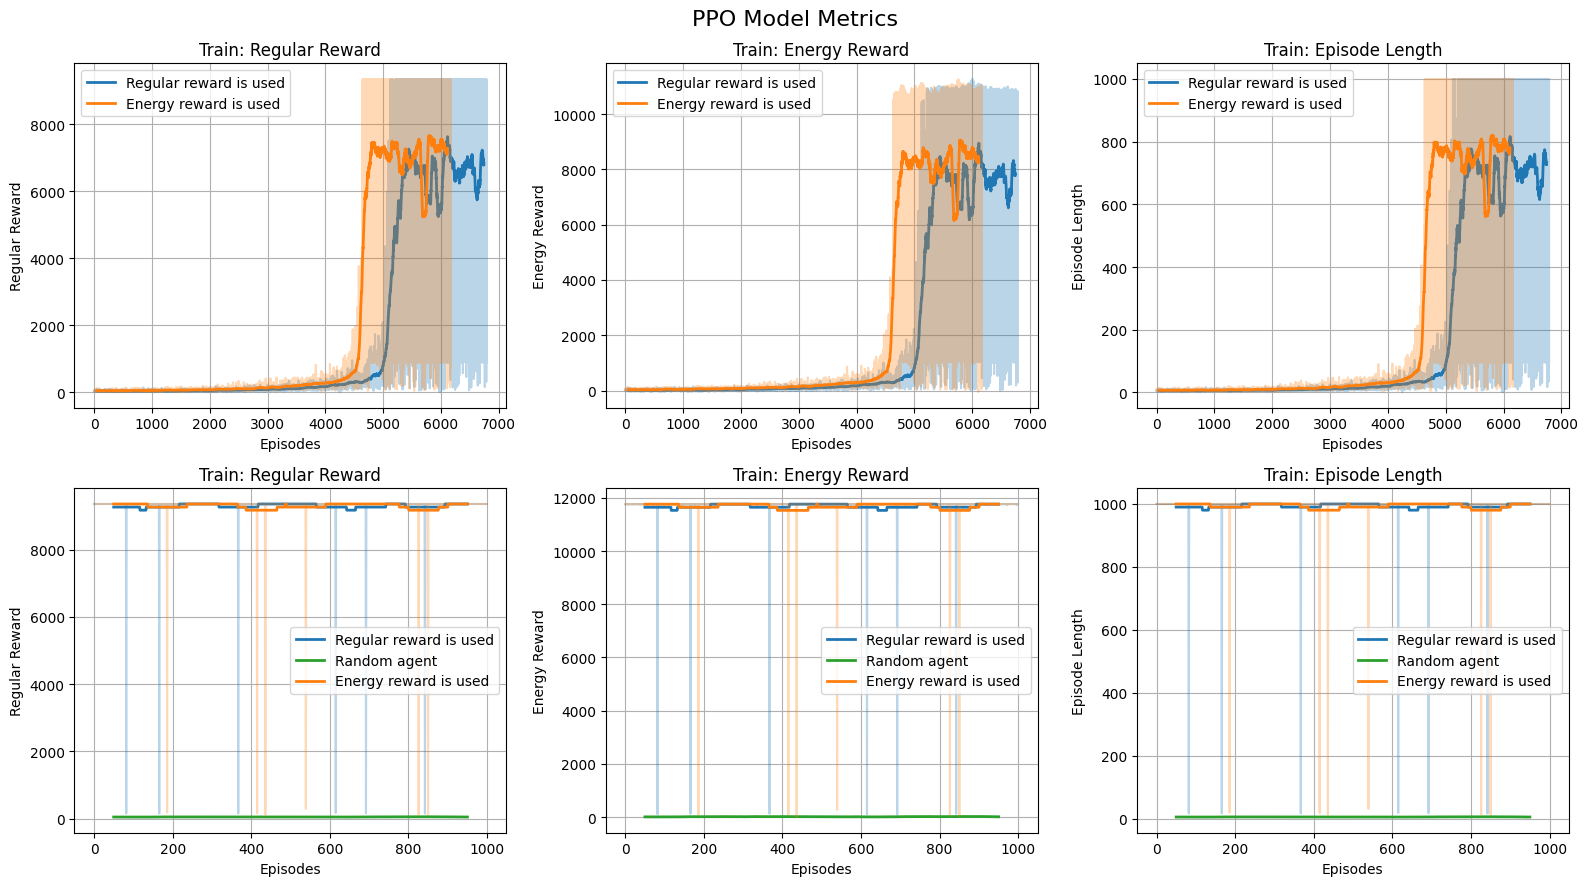

In [2]:
figure = plot_metrics("PPO", 100)
figure.savefig("./results/ppo-metrics.jpg")

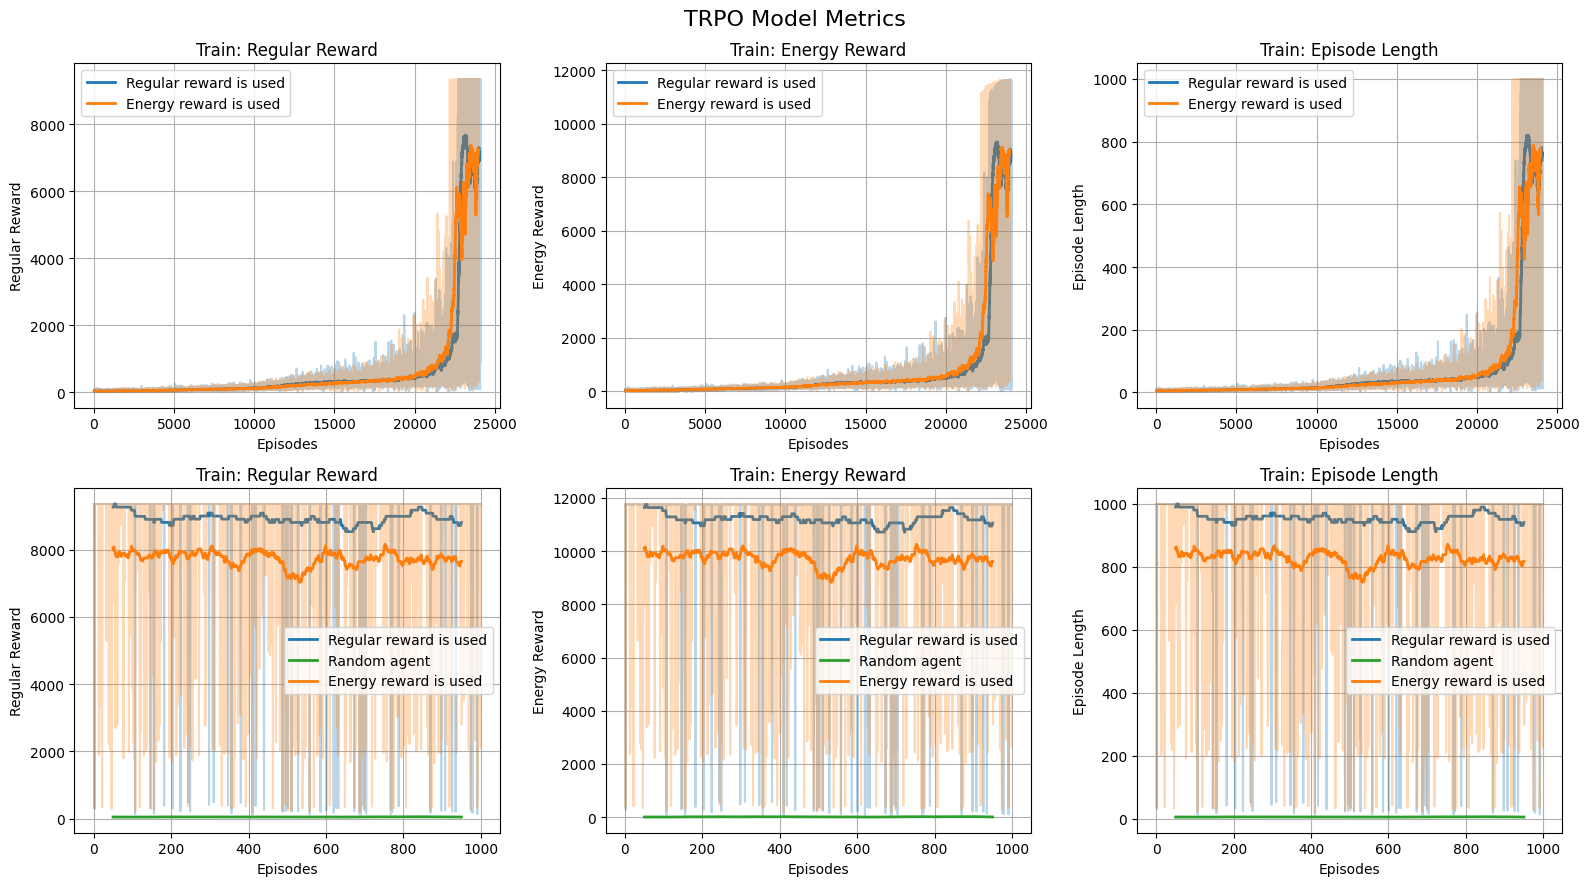

In [3]:
figure = plot_metrics("TRPO", 100)
figure.savefig("./results/ppo-metrics.jpg")